In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyvis.network import Network
from DAG import DAG
from gradient_descent import gradient_descent
from tqdm.notebook import tqdm

# Sweep connectivity

In [3]:
size = 10

num_iterations = 3

sweep = np.linspace(0.1, 1, 10)

results = np.zeros((len(sweep), num_iterations))
actual_connections = np.zeros((len(sweep), num_iterations))


for i, connectivity in tqdm(enumerate(sweep), total = len(sweep)):
    for j in tqdm(range(num_iterations)):
        dag = DAG(n = size, strength=2, connectivity = connectivity)
        actual_connections[i,j] = (dag.adjacency_matrix != 0).sum()
        print("Starting gradient descent")
        best = gradient_descent(dag, num_iterations = 50, lr = 0.2, VERBOSE = False)
        print("Finished gradient descent")
        dag.adjacency_matrix = best
        vs = dag.get_varsortability(smart = True, N = 10000000)
        results[i,j] = vs["smart"]


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Starting gradient descent
Finished gradient descent
Starting gradient descent
Finished gradient descent
Starting gradient descent
Finished gradient descent


  0%|          | 0/3 [00:00<?, ?it/s]

Starting gradient descent
Finished gradient descent
Starting gradient descent
Finished gradient descent
Starting gradient descent
Finished gradient descent


  0%|          | 0/3 [00:00<?, ?it/s]

Starting gradient descent
Finished gradient descent
Starting gradient descent
Finished gradient descent
Starting gradient descent
Finished gradient descent


  0%|          | 0/3 [00:00<?, ?it/s]

Starting gradient descent
Finished gradient descent
Starting gradient descent
Finished gradient descent
Starting gradient descent
Finished gradient descent


  0%|          | 0/3 [00:00<?, ?it/s]

Starting gradient descent
Finished gradient descent
Starting gradient descent
Finished gradient descent
Starting gradient descent
Finished gradient descent


  0%|          | 0/3 [00:00<?, ?it/s]

Starting gradient descent
Finished gradient descent
Starting gradient descent
Finished gradient descent
Starting gradient descent
Finished gradient descent


  0%|          | 0/3 [00:00<?, ?it/s]

Starting gradient descent
Finished gradient descent
Starting gradient descent
Finished gradient descent
Starting gradient descent
Finished gradient descent


  0%|          | 0/3 [00:00<?, ?it/s]

Starting gradient descent
Finished gradient descent
Starting gradient descent
Finished gradient descent
Starting gradient descent
Finished gradient descent


  0%|          | 0/3 [00:00<?, ?it/s]

Starting gradient descent
Finished gradient descent
Starting gradient descent
Finished gradient descent
Starting gradient descent
Finished gradient descent


  0%|          | 0/3 [00:00<?, ?it/s]

Starting gradient descent
Finished gradient descent
Starting gradient descent
Finished gradient descent
Starting gradient descent
Finished gradient descent


In [4]:
# save as csv files
np.savetxt("results_10.csv", results, delimiter=",")
np.savetxt("actual_connections_10.csv", actual_connections, delimiter=",")

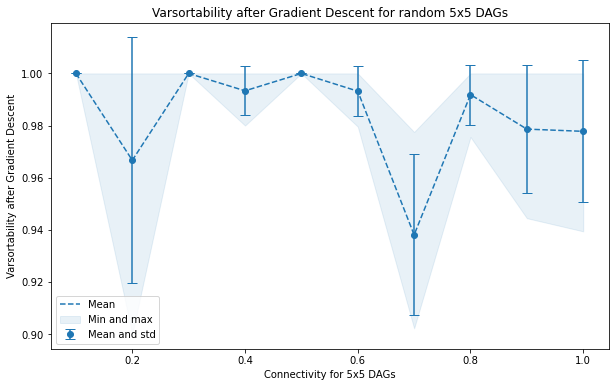

In [5]:
# make the plot

color = "#1f77b4"

mean, std = np.mean(results, axis = 1), np.std(results, axis = 1)

_max, _min = np.max(results, axis = 1), np.min(results, axis = 1)

fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(sweep, np.mean(results, axis = 1), '--', label = "Mean", color = color)
# make error bars
ax.fill_between(sweep, _min, _max, alpha = 0.1, label = "Min and max", color = color)
ax.errorbar(sweep, mean, yerr = std, fmt = 'o', label = "Mean and std", capsize = 5, color = color)

ax.set_xlabel("Connectivity for 5x5 DAGs")
ax.set_ylabel("Varsortability after Gradient Descent")
ax.legend()

plt.title("Varsortability after Gradient Descent for random 5x5 DAGs")
plt.show()

In [13]:
dag.adjacency_matrix = best

dag.get_varsortability(smart = True, simulated = True, N = 10000000)

{'simulated': 0.998025666337611, 'smart': 0.9757575757575757}

In [8]:
dag = DAG(n = 10, strength=2, connectivity = 1)
best = gradient_descent(dag, num_iterations = 51, lr = 1e-2, VERBOSE = True)


Iteration 0: loss = 77.404
current_guess: [ 2.          0.57108856  2.          0.6479618   1.84234088 -1.11114339
  1.29691135 -0.5         1.24454039 -2.          2.         -1.24153029
 -1.68560885 -1.02321741  1.83372085  0.5         0.80100982  0.5
  0.5         2.          2.          0.5         0.99227682  2.
 -0.5         0.96791821  1.52344594  1.6674249  -1.47604862  2.
  2.          0.75099472  0.5        -1.02241696 -0.5         0.8059551
 -0.5         0.5        -0.5         1.33229011  0.94199681  0.5
  2.         -1.67075719 -0.5       ]
varsortability: 0.9757575757575757
Iteration 1: loss = 82.844
Iteration 2: loss = 83.241
Iteration 3: loss = 79.662
Iteration 4: loss = 70.606
Iteration 5: loss = 80.071
Iteration 6: loss = 82.280
Iteration 7: loss = 75.567
Iteration 8: loss = 85.538
Iteration 9: loss = 76.677
Iteration 10: loss = 69.602
Iteration 11: loss = 77.069
Iteration 12: loss = 78.825
Iteration 13: loss = 84.529
Iteration 14: loss = 80.998
Iteration 15: loss = 7